<a href="https://colab.research.google.com/github/whyb2nrml/KNOU/blob/main/%EC%A7%80%EB%8A%A5%ED%98%95%EC%A0%95%EB%B3%B4%EC%B2%98%EB%A6%AC%EC%8B%9C%EC%8A%A4%ED%85%9C_4%EA%B0%95_%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88_%EB%B6%84%EB%A5%98%EA%B8%B0_%EC%A0%90%EA%B2%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**다음에 주어진 단계에 따라 데이터를 생성하고 베이지안 분류기를 이용하여 분류를 수행하시오.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

### (1) 매트랩을 이용하여 다음과 같은 평균과 공분산을 가지는 가우시안 분포를 따르는 2차원 데이터를 각각 100개씩 가지는 두 클래스 집합를 생성하시오. 생성된 데이터를 2차원 평면상의 점으로 표시한 그래프를 그리시오.

$μ_1 = [0, 0]^T, \quad μ_2 = [4, 4]^T, \quad $ 
$\sum_1 = \sum_2 = \begin{pmatrix} 1 & 0 \\ 0 & 2 \end{pmatrix}$

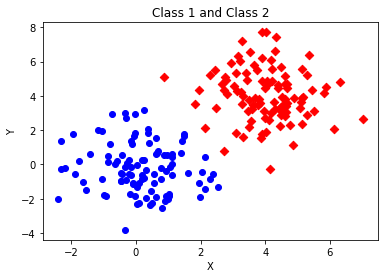

<Figure size 864x864 with 0 Axes>

In [61]:
# 100*2 형태의 평균값 선언
N = 100
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [4, 4])

# 2*2 형태의 공분산 행렬 선언
sigma1 = np.full((2,2), [[1,0],[0,2]])
sigma2 = sigma1

# 100*2 형태, 평균=0, 분산=1의 정규분포값 선언 
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))

# 정규분포 행렬 (100*2)와 공분산행렬제곱근의 행렬곱

# 방법1: 비추
# c1 = np.dot(c1, sqrtm(sigma1)) + u1
# c2 = np.dot(c2, sqrtm(sigma2)) + u2

# 방법2: 추
# c1 = np.matmul(c1, sqrtm(sigma1)) + u1
# c2 = np.matmul(c2, sqrtm(sigma2)) + u2

# 방법3: 추
c1 = c1 @ sqrtm(sigma1) + u1
c2 = c2 @ sqrtm(sigma2) + u2

# plt.figure(figsize=(8,6))
# plt.plot(c1[:, 0], c1[:, 1], 'bo', c2[:, 0], c2[:, 1], 'g^')
# plt.show()

x1, y1, x2, y2 = c1[:, 0], c1[:, 1], c2[:, 0], c2[:, 1]
fig, ax = plt.subplots()
fig = plt.figure(figsize=(12, 12))
ax.scatter(x1, y1, marker='o', color='blue')
ax.scatter(x2, y2, marker='D', color='red')
ax.set_title("Class 1 and Class 2")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.show()

### (2) 각 클래스의 데이터 분포가 가우시안 함수를 따른다는 가정 하에, (1)에서 생성한 데이터 집합을 이용하여 각 클래스의 확률밀도함수 p(x|Ck)의 파라미터(평균과 공분산)를 추정하시오.

In [56]:
c1_xmean=c1[:, 0].mean()
c1_ymean=c1[:, 1].mean()
c1_meancov=np.cov(c1[:, 0], c1[:, 1])

c2_xmean=c2[:, 0].mean()
c2_ymean=c2[:, 1].mean()
c2_meancov=np.cov(c2[:, 0], c2[:, 1])

type(c1_meancov)

print(f"클래스 1의 x, y 평균값은 각각 {c1_xmean:.2f}, {c1_ymean:.2f} 이다.")
print(f"클래스 2의 x, y 평균값은 각각 {c2_xmean:.2f}, {c2_ymean:.2f} 이다.")
print()
with np.printoptions(precision=2, suppress=True):
  print("클래스 1의 평균 공분산값은 아래와 같다.", c1_meancov, sep='\n')
  print()
  print("클래스 2의 평균 공분산값은 아래와 같다.", c2_meancov, sep='\n')

클래스 1의 x, y 평균값은 각각 -0.01, 0.10 이다.
클래스 2의 x, y 평균값은 각각 4.25, 4.43 이다.

클래스 1의 평균 공분산값은 아래와 같다.
[[0.99 0.06]
 [0.06 1.7 ]]

클래스 2의 평균 공분산값은 아래와 같다.
[[ 1.09 -0.02]
 [-0.02  2.25]]


### (3) (2)에서 추정된 파라미터를 이용하여 교재 4.3절에서 소개된 판별함수를 찾으시오.

#### 교재의 프로그램 4-1 Bayes Classifier를 파이썬으로 구현해보기

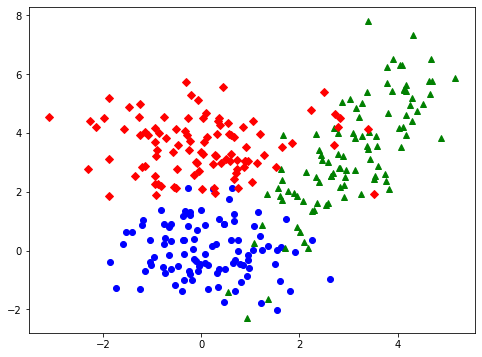

In [65]:
# 데이터 생성
N = 100

# 평균값 벡터 생성
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [3, 3])
u3 = np.full((N, 2), [0, 3.5])

# 공분산값 벡터 생성
sigma1 = np.full((2,2), [[1,0],[0,1]])
sigma2 = np.full((2,2), [[1,1.6],[1.6,4]])
sigma3 = np.full((2,2), [[2,0],[0,1]])

# 클래스별 정규분포 벡터 생성
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))
c3 = np.random.normal(0, 1, size=(N, 2))

# 클래스별 목표 데이터 생성
c1 = np.matmul(c1, sqrtm(sigma1)) + u1
c2 = np.matmul(c2, sqrtm(sigma2)) + u2
c3 = np.matmul(c3, sqrtm(sigma3)) + u3

# 목표 데이터 시각화
plt.figure(figsize=(8,6))
plt.plot(c1[:, 0], c1[:, 1], 'bo', c2[:, 0], c2[:, 1], 'g^', c3[:, 0], c3[:, 1], 'rD')
plt.show()

In [78]:
# 클래스의 수
K=3

# 클래스별 표본평균 계산
M=[[c1[:, 0].mean(), c1[:, 1].mean()],
   [c2[:, 0].mean(), c2[:, 1].mean()],
   [c3[:, 0].mean(), c3[:, 1].mean()]]

# 클래스별 표본공분산 계산
S = [np.cov(c1[:, 0], c1[:, 1]), 
     np.cov(c2[:, 0], c2[:, 1]), 
     np.cov(c3[:, 0], c3[:, 1])] 

# 클래스별 표본공분산의 평균
smean = (np.cov(c1[:, 0], c1[:, 1]) 
        + np.cov(c2[:, 0], c2[:, 1]) 
        + np.cov(c3[:, 0], c3[:, 1])) / K

Dtrain = [c1, c2, c3] # 학습 데이터 구성
Etrain = np.full((3,1), 0) # 클래스별로 판별함수로 오분류한 케이스를 카운트할 객체
N = c1.shape[0] # 클래스별 데이터의 수

# 클래스별 
for k in range(K):
  X = Dtrain[k]
  for i in range(N): # 각 데이터에 대해 분류 시작
    d1=[]; d2=[]; d3=[]
    for j in range(K): # 세 개의 판별함수의 값 계산
      # 단위 공분산행렬을 가정한 경우의 판별함수
      d1.append( (X[i, :]-M[j]) @ (X[i, :]-M[j]) )
      # 모든 클래스에 동일한 공분산행렬을 가정한 경우의 판별함수
      d2.append( ((X[i, :]-M[j]) @ np.linalg.inv(smean))  @ (X[i, :]-M[j]) )
      # 일반적인 공분산행렬을 가정한 경우의 판별함수
      d3.append( ((X[i, :]-M[j]) @ np.linalg.inv(S[j])) @ (X[i, :]-M[j]) )
    if k != d1.index(np.min(d1)): # 각 판별함수 값에 따라 분류
      Etrain[0] = Etrain[0] + 1 # 분류결과가 원래 클래스와 다르면 오류 증가
    if k != d2.index(np.min(d2)):
      Etrain[1] = Etrain[1] + 1
    if k != d3.index(np.min(d3)):
      Etrain[2] = Etrain[2] + 1

Error_rate = Etrain/(N*K) # 오분류율(학습오차) 출력
print(Error_rate)

[[0.08333333]
 [0.08666667]
 [0.06666667]]


#### 문제에 맞게 구현해보기

In [79]:
K=2 # 클래스의 수
M=[[c1[:, 0].mean(), c1[:, 1].mean()],
   [c2[:, 0].mean(), c2[:, 1].mean()]] # 클래스별 표본평균 계산

# 클래스별 표본공분산 계산
S = [np.cov(c1[:, 0], c1[:, 1]), np.cov(c2[:, 0], c2[:, 1])] 

# 클래스별 표본공분산의 평균
smean = (np.cov(c1[:, 0], c1[:, 1]) + np.cov(c2[:, 0], c2[:, 1])) / K

Dtrain = [c1, c2] # 학습 데이터 구성
Etrain = np.full((3,1), 0) # 오분류 데이터의 수를 셈
N = c1.shape[0] # 각 클래스별 데이터의 수

for k in range(K):
  X = Dtrain[k]
  for i in range(N): # 각 데이터에 대해 분류 시작
    d1=[]; d2=[]; d3=[]
    for j in range(K): # 세 개의 판별함수의 값 계산
      # 단위 공분산행렬을 가정한 경우의 판별함수
      d1.append( np.matmul( (X[i, :]-M[j]), (X[i, :]-M[j]) ) )
      # 모든 클래스에 동일한 공분산행렬을 가정한 경우의 판별함수
      d2.append( np.matmul( np.matmul( (X[i, :]-M[j]), np.linalg.inv(smean)), (X[i, :]-M[j]) ) )
      # 일반적인 공분산행렬을 가정한 경우의 판별함수
      d3.append( np.dot( np.dot( (X[i, :]-M[j]), np.linalg.inv(S[j])), (X[i, :]-M[j]) ) )
    if k != d1.index(np.min(d1)): # 각 판별함수 값에 따라 분류
      Etrain[0] = Etrain[0] + 1 # 분류결과가 원래 클래스와 다르면 오류 증가
    if k != d2.index(np.min(d2)):
      Etrain[1] = Etrain[1] + 1
    if k != d3.index(np.min(d3)):
      Etrain[2] = Etrain[2] + 1

Error_rate = Etrain/(N*K) # 오분류율(학습오차) 출력
Error_rate

array([[0.05 ],
       [0.045],
       [0.04 ]])

### (4) 새롭게 주어진 데이터 $[2, 1]^T$에 대해, (3)에서 얻어진 판별함수를 이용하여 어떤 클래스에 속하는지를 매트랩을 이용하여 판단하시오.

In [81]:
# 판별 프로세스 함수화
def clsf_2d (data):
    d1=[]; d2=[]; d3=[]
    data = np.array(data)
    for j in range(K):
        d1.append( np.matmul( (data-M[j]), (data-M[j]) ) )
        d2.append( np.matmul( np.matmul( (data-M[j]), np.linalg.inv(smean)), (data-M[j]) ) )
        d3.append( np.matmul( np.matmul( (data-M[j]), np.linalg.inv(S[j])), (data-M[j]) ) )
        d1_idx = d1.index(np.min(d1))
        d2_idx = d2.index(np.min(d2))
        d3_idx = d3.index(np.min(d3))
    return d1_idx, d2_idx, d3_idx

# 함수 실행
tmp = clsf_2d([2,1])
print(tmp) # 첫째 판별함수는 1번, 둘째~셋째 판별함수는 2번 클래스로 판단

(0, 1, 1)


### (5) (3)에서 계산된 판별함수로부터 얻어지는 결정경계를 찾아 매트랩을 이용하여 (1)에서 그린 그래프 위에 표시하시오.

#### 교재의 프로그램 4-2 Drawing Decision Boundary 따라서 구현해보기

In [205]:
# 클래스의 수
K=3 

# 클래스별 표본평균 계산
M=[[c1[:, 0].mean(), c1[:, 1].mean()],
   [c2[:, 0].mean(), c2[:, 1].mean()],
   [c3[:, 0].mean(), c3[:, 1].mean()]]

# 클래스별 표본공분산 계산
S = [np.cov(c1[:, 0], c1[:, 1]), 
     np.cov(c2[:, 0], c2[:, 1]), 
     np.cov(c3[:, 0], c3[:, 1]) ] 

# 클래스별 표본공분산의 평균
smean = (np.cov(c1[:, 0], c1[:, 1]) 
        + np.cov(c2[:, 0], c2[:, 1]) 
        + np.cov(c3[:, 0], c3[:, 1]) ) / K

# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

d1i=[]; d2i=[]; d3i=[]
for i in range(len(XY)):
  d1=[]; d2=[]; d3=[]
  for j in range(K): # 세 개의 판별함수의 값 계산
    # 단위 공분산행렬을 가정한 경우의 판별함수
    d1.append( np.matmul( (XY[i]-M[j]), (XY[i]-M[j]) ) )
    # 모든 클래스에 동일한 공분산행렬을 가정한 경우의 판별함수
    d2.append( np.matmul( np.matmul( (XY[i]-M[j]), np.linalg.inv(smean)), (XY[i]-M[j]) ) )
    # 일반적인 공분산행렬을 가정한 경우의 판별함수
    d3.append( np.matmul( np.matmul( (XY[i]-M[j]), np.linalg.inv(S[j])), (XY[i]-M[j]) ) )
  d1i.append(d1.index(np.min(d1)))
  d2i.append(d2.index(np.min(d2)))
  d3i.append(d3.index(np.min(d3)))

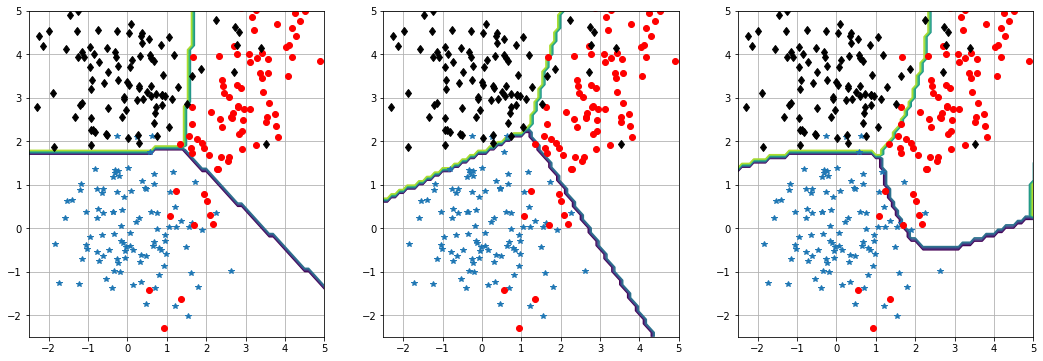

In [206]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
plt.plot(c3[:, 0], c3[:, 1], 'kd')
res = np.reshape(d1i, x.shape)
plt.contour(x, y, res)

plt.subplot(1, 3, 2)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
plt.plot(c3[:, 0], c3[:, 1], 'kd')
res = np.reshape(d2i, x.shape)
plt.contour(x, y, res)

plt.subplot(1, 3, 3)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
plt.plot(c3[:, 0], c3[:, 1], 'kd')
res = np.reshape(d3i, x.shape)
plt.contour(x, y, res)
plt.show()

#### 문제에 맞게 구현해보기

In [207]:
K=2 # 클래스의 수
M=[[c1[:, 0].mean(), c1[:, 1].mean()],
   [c2[:, 0].mean(), c2[:, 1].mean()]] # 클래스별 표본평균 계산

# 클래스별 표본공분산 계산
S = [np.cov(c1[:, 0], c1[:, 1]), np.cov(c2[:, 0], c2[:, 1])] 

# 클래스별 표본공분산의 평균
smean = (np.cov(c1[:, 0], c1[:, 1]) + np.cov(c2[:, 0], c2[:, 1])) / K

# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

d1i=[]; d2i=[]; d3i=[]
for i in range(len(XY)):
  d1=[]; d2=[]; d3=[]
  for j in range(K): # 세 개의 판별함수의 값 계산
    # 단위 공분산행렬을 가정한 경우의 판별함수
    d1.append( np.matmul( (XY[i]-M[j]), (XY[i]-M[j]) ) )
    # 모든 클래스에 동일한 공분산행렬을 가정한 경우의 판별함수
    d2.append( np.matmul( np.matmul( (XY[i]-M[j]), np.linalg.inv(smean)), (XY[i]-M[j]) ) )
    # 일반적인 공분산행렬을 가정한 경우의 판별함수
    d3.append( np.matmul( np.matmul( (XY[i]-M[j]), np.linalg.inv(S[j])), (XY[i]-M[j]) ) )
  d1i.append(d1.index(np.min(d1)))
  d2i.append(d2.index(np.min(d2)))
  d3i.append(d3.index(np.min(d3)))

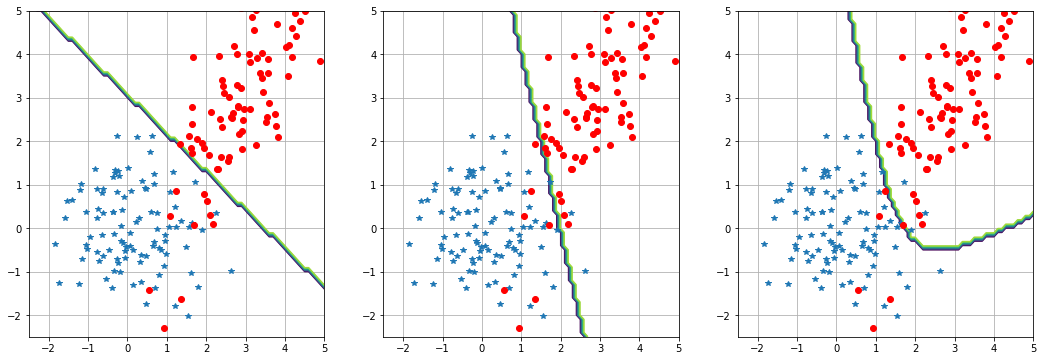

In [208]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
res = np.reshape(d1i, x.shape)
plt.contour(x, y, res)

plt.subplot(1, 3, 2)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
res = np.reshape(d2i, x.shape)
plt.contour(x, y, res)

plt.subplot(1, 3, 3)
plt.grid()
plt.axis([-2.5, 5, -2.5, 5])
plt.plot(c1[:, 0], c1[:, 1], '*')
plt.plot(c2[:, 0], c2[:, 1], 'ro')
res = np.reshape(d3i, x.shape)
plt.contour(x, y, res)
plt.show()